# $$\text{PI - like:}$$

In [1]:
import numpy as np
import control as ct
import matplotlib.pyplot as plt
import scienceplots

# Configurações de plot:
plt.style.use([
    'grid',
    'retro'
])
#plt.rcParams['lines.linewidth'] = 2
#plt.rcParams['font.size'] = 20
plt.rcParams['figure.figsize'] = (10, 8)
colors = ['C0', 'C1', 'C2', 'C4', 'C5', 'y']

### $$\text{Definição do sistema em espaço de estados:}$$

In [2]:
A = np.array([
    [0, 1],
    [-21.41/16.17, -8.421/16.17]
])

B = np.array([0,1])[:, np.newaxis]

C = np.array([16.17/16.17, 0])

### $$\text{Projeto dos ganhos do PI-like:}$$

In [35]:
k = np.array([12, 10, -5])

### $$\text{Interconexão da malha fechada:}$$

In [36]:
#Sistema:
stateslabels = ['y']
for i in range(len(A)):
    stateslabels.append(f'x{i+1}')
G = ct.ss(A,B,np.vstack((C, np.identity(len(A)))),np.zeros((len(A)+1, 1)), inputs=['u'], outputs=stateslabels)

#Somador que gera o sinal de erro:
some = ct.summing_junction(inputs=['r', '-y'], output='e')

#Realimentação dos estados:
K = []
kxl = []
for i in range(len(k)-1):
    current_kxl = f'kx{i+1}'
    K.append(ct.tf((-k[i]), (1), inputs=f'x{i+1}', outputs=current_kxl))
    kxl.append(current_kxl)

#Ramo integrador:
Gi = ct.tf([1], [1, 0], inputs='e', outputs='xa')
ka = ct.tf((-k[-1]), (1), inputs='xa', outputs='kaxa')
kxl.append('kaxa')

#Somador que gera o sinal de controle:
somu = ct.summing_junction(inputs=kxl, output='u')

#Interconnect:
componentes = [G, Gi, ka, somu, some]
componentes.extend(K)
out = ['u']
out.extend(stateslabels)
out.append('xa')
L = ct.interconnect(componentes, inputs='r', outputs=out)

### $$\text{Simulação do sistema:}$$

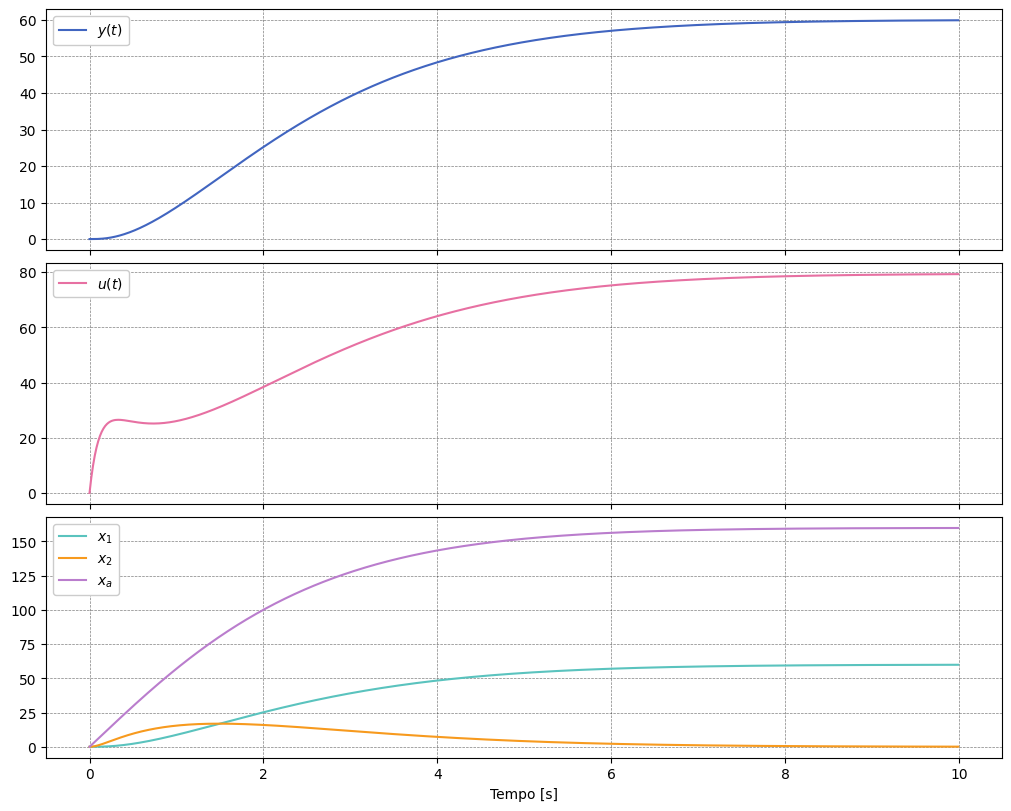

In [39]:
#Vetor de tempo:
t = np.arange(0, 10, 1e-2)

#Vetor de referência:
r = np.ones(t.shape)*60

#Simulação do sistema:
t, sol = ct.forced_response(L, t, r)

#Demultiplex da saída:
u = sol[0]
y = sol[1]
x = sol[2:]

#Plot das curvas:
labels = []
for i in range(len(x)-1):
    labels.append(f'$x_{i+1}$')
labels.append('$x_a$')
plt.subplots(3, 1, sharex=True, constrained_layout = True)
plt.subplot(3, 1, 1)
plt.plot(t, y, color='C0', label='$y(t)$')
plt.legend()
plt.subplot(3, 1, 2)
plt.plot(t, u, color='C1', label='$u(t)$')
plt.legend()
plt.subplot(3, 1, 3)
for i in range(len(x)):
    plt.plot(t, x[i], color=colors[i+2], label=labels[i])
plt.xlabel('Tempo [s]')
plt.legend()
plt.show()